In [52]:
import sys
sys.path.insert(0, '..')

import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# Rozwiązywanie problemu klasyfikacji XOR

Tworzymy prosty zbiór danych

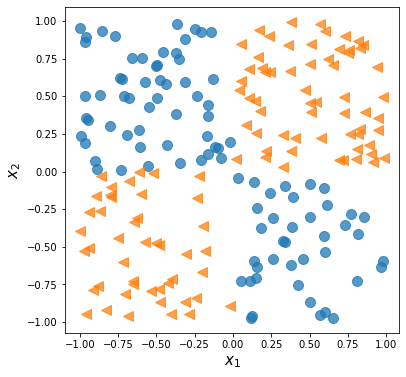

In [53]:
np.random.seed(1)
torch.manual_seed(1)
x = np.random.uniform(low=-1, high=1, size=(200, 2))
y = np.ones(len(x))
y[x[:, 0] * x[:, 1]<0] = 0

n_train = 100
x_train = torch.tensor(x[:n_train, :], dtype=torch.float32)
y_train = torch.tensor(y[:n_train], dtype=torch.float32)
x_valid = torch.tensor(x[n_train:, :], dtype=torch.float32)
y_valid = torch.tensor(y[n_train:], dtype=torch.float32)

fig = plt.figure(figsize=(6, 6))
plt.plot(x[y==0, 0], 
         x[y==0, 1], 'o', alpha=0.75, markersize=10)
plt.plot(x[y==1, 0], 
         x[y==1, 1], '<', alpha=0.75, markersize=10)
plt.xlabel(r'$x_1$', size=15)
plt.ylabel(r'$x_2$', size=15)

#plt.savefig('figures/13_02.png', dpi=300)
plt.show()

Tworzymy dataloder

In [54]:
from torch.utils.data import DataLoader, TensorDataset
 
    
train_ds = TensorDataset(x_train, y_train)
batch_size = 2
torch.manual_seed(1)
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

Tworzymy prostą sieć

In [55]:
import torch.nn as nn

model = nn.Sequential(
    nn.Linear(2, 1),
    nn.Sigmoid()
)

model

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): Sigmoid()
)

Dodatkowe informacje

* Initializers nn.init: https://pytorch.org/docs/stable/nn.init.html
* L1 Regularizers nn.L1Loss: https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html#torch.nn.L1Loss
* L2 Regularizers weight_decay: https://pytorch.org/docs/stable/optim.html
* Activations: https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity

In [56]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [57]:
torch.manual_seed(1)
num_epochs = 200

In [58]:
def train(model, num_epochs, train_dl, x_valid, y_valid):
    loss_hist_train = [0] * num_epochs
    accuracy_hist_train = [0] * num_epochs
    loss_hist_valid = [0] * num_epochs
    accuracy_hist_valid = [0] * num_epochs
    for epoch in range(num_epochs):
        for x_batch, y_batch in train_dl:
            pred = model(x_batch)[:, 0]
            loss = loss_fn(pred, y_batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            loss_hist_train[epoch] += loss.item()
            is_correct = ((pred>=0.5).float() == y_batch).float()
            accuracy_hist_train[epoch] += is_correct.mean()

        loss_hist_train[epoch] /= n_train/batch_size
        accuracy_hist_train[epoch] /= n_train/batch_size

        pred = model(x_valid)[:, 0]
        loss = loss_fn(pred, y_valid)
        loss_hist_valid[epoch] = loss.item()
        is_correct = ((pred>=0.5).float() == y_valid).float()
        accuracy_hist_valid[epoch] += is_correct.mean()
        print("Epoach", epoch ,"Acc val ", accuracy_hist_valid[epoch].numpy(), "Acc train", accuracy_hist_train[epoch].numpy())
    return loss_hist_train, loss_hist_valid, accuracy_hist_train, accuracy_hist_valid



In [59]:
history = train(model, num_epochs, train_dl, x_valid, y_valid)

Epoach 0 Acc val  0.43 Acc train 0.38
Epoach 1 Acc val  0.42 Acc train 0.39
Epoach 2 Acc val  0.42 Acc train 0.38
Epoach 3 Acc val  0.42 Acc train 0.39
Epoach 4 Acc val  0.42 Acc train 0.39
Epoach 5 Acc val  0.42 Acc train 0.39
Epoach 6 Acc val  0.42 Acc train 0.39
Epoach 7 Acc val  0.42 Acc train 0.39
Epoach 8 Acc val  0.42 Acc train 0.41
Epoach 9 Acc val  0.42 Acc train 0.41
Epoach 10 Acc val  0.42 Acc train 0.41
Epoach 11 Acc val  0.42 Acc train 0.41
Epoach 12 Acc val  0.43 Acc train 0.42
Epoach 13 Acc val  0.43 Acc train 0.43
Epoach 14 Acc val  0.43 Acc train 0.43
Epoach 15 Acc val  0.43 Acc train 0.43
Epoach 16 Acc val  0.44 Acc train 0.43
Epoach 17 Acc val  0.44 Acc train 0.43
Epoach 18 Acc val  0.45 Acc train 0.43
Epoach 19 Acc val  0.44 Acc train 0.44
Epoach 20 Acc val  0.44 Acc train 0.44
Epoach 21 Acc val  0.44 Acc train 0.44
Epoach 22 Acc val  0.45 Acc train 0.44
Epoach 23 Acc val  0.46 Acc train 0.44
Epoach 24 Acc val  0.46 Acc train 0.44
Epoach 25 Acc val  0.49 Acc train 0

Text(0.5, 0, 'Epochs')

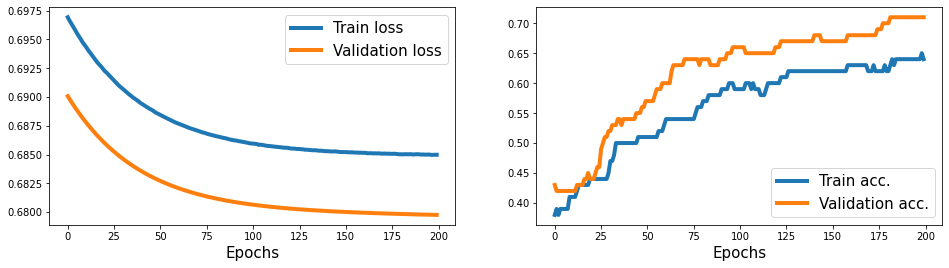

In [61]:
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 2, 1)
plt.plot(history[0], lw=4)
plt.plot(history[1], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 2, 2)
plt.plot(history[2], lw=4)
plt.plot(history[3], lw=4)
plt.legend(['Train acc.', 'Validation acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

#plt.savefig('figures/13_03.png', dpi=300)

To samo ale bardzie profesjonalnie

In [69]:
class MyModule(nn.Module):
    def __init__(self):
        super().__init__()
        l1 = nn.Linear(2, 4)
        a1 = nn.ReLU()
        l2 = nn.Linear(4, 4)
        a2 = nn.ReLU()
        l3 = nn.Linear(4, 1)
        a3 = nn.Sigmoid()
        l = [l1, a1, l2, a2, l3, a3]
        self.module_list = nn.ModuleList(l)

    def forward(self, x):
        for f in self.module_list:
            x = f(x)
        return x
    
    def predict(self, x):
        x = torch.tensor(x, dtype=torch.float32)
        pred = self.forward(x)[:, 0]
        return (pred>=0.5).float()
            
model = MyModule()
model

MyModule(
  (module_list): ModuleList(
    (0): Linear(in_features=2, out_features=4, bias=True)
    (1): ReLU()
    (2): Linear(in_features=4, out_features=4, bias=True)
    (3): ReLU()
    (4): Linear(in_features=4, out_features=1, bias=True)
    (5): Sigmoid()
  )
)

In [70]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.015)
    
# torch.manual_seed(1)
history = train(model, num_epochs, train_dl, x_valid, y_valid)

Epoach 0 Acc val  0.44 Acc train 0.45
Epoach 1 Acc val  0.5 Acc train 0.48
Epoach 2 Acc val  0.52 Acc train 0.49
Epoach 3 Acc val  0.52 Acc train 0.53
Epoach 4 Acc val  0.53 Acc train 0.55
Epoach 5 Acc val  0.53 Acc train 0.59
Epoach 6 Acc val  0.53 Acc train 0.56
Epoach 7 Acc val  0.53 Acc train 0.57
Epoach 8 Acc val  0.53 Acc train 0.6
Epoach 9 Acc val  0.54 Acc train 0.6
Epoach 10 Acc val  0.55 Acc train 0.61
Epoach 11 Acc val  0.56 Acc train 0.6
Epoach 12 Acc val  0.57 Acc train 0.6
Epoach 13 Acc val  0.58 Acc train 0.61
Epoach 14 Acc val  0.58 Acc train 0.6
Epoach 15 Acc val  0.59 Acc train 0.61
Epoach 16 Acc val  0.59 Acc train 0.6
Epoach 17 Acc val  0.58 Acc train 0.62
Epoach 18 Acc val  0.59 Acc train 0.61
Epoach 19 Acc val  0.6 Acc train 0.63
Epoach 20 Acc val  0.6 Acc train 0.63
Epoach 21 Acc val  0.61 Acc train 0.63
Epoach 22 Acc val  0.6 Acc train 0.64
Epoach 23 Acc val  0.6 Acc train 0.65
Epoach 24 Acc val  0.6 Acc train 0.64
Epoach 25 Acc val  0.63 Acc train 0.65
Epoach 2

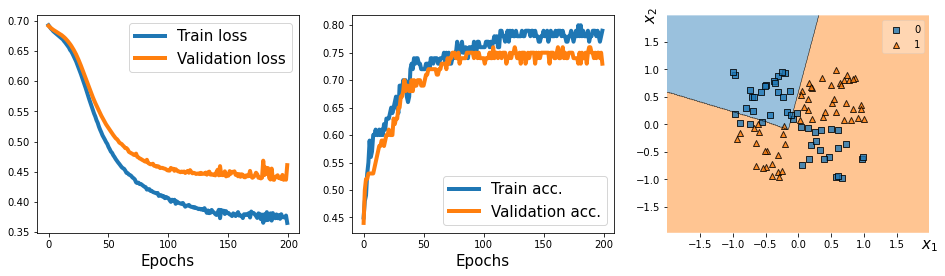

In [71]:
from mlxtend.plotting import plot_decision_regions


fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history[0], lw=4)
plt.plot(history[1], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 2)
plt.plot(history[2], lw=4)
plt.plot(history[3], lw=4)
plt.legend(['Train acc.', 'Validation acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X=x_valid.numpy(), 
                      y=y_valid.numpy().astype(np.int64),
                      clf=model)
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)

#plt.savefig('figures/13_05.png', dpi=300)
plt.show()

# Klasyfikacja cyfr pisanych odręcznie MNIST

In [72]:
import torchvision 
from torchvision import transforms 


image_path = './'
transform = transforms.Compose([transforms.ToTensor()])

mnist_train_dataset = torchvision.datasets.MNIST(root=image_path, 
                                           train=True, 
                                           transform=transform, 
                                           download=True)
mnist_test_dataset = torchvision.datasets.MNIST(root=image_path, 
                                           train=False, 
                                           transform=transform, 
                                           download=False)
 
batch_size = 64
torch.manual_seed(1)
train_dl = DataLoader(mnist_train_dataset, batch_size, shuffle=True)


Extracting ./MNIST\raw\train-images-idx3-ubyte.gz to ./MNIST\raw




Extracting ./MNIST\raw\train-labels-idx1-ubyte.gz to ./MNIST\raw




Extracting ./MNIST\raw\t10k-images-idx3-ubyte.gz to ./MNIST\raw




Extracting ./MNIST\raw\t10k-labels-idx1-ubyte.gz to ./MNIST\raw



C:\ProgramData\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [73]:
hidden_units = [32, 16]
image_size = mnist_train_dataset[0][0].shape
input_size = image_size[0] * image_size[1] * image_size[2]

all_layers = [nn.Flatten()]
for hidden_unit in hidden_units:
    layer = nn.Linear(input_size, hidden_unit)
    all_layers.append(layer)
    all_layers.append(nn.ReLU())
    input_size = hidden_unit

all_layers.append(nn.Linear(hidden_units[-1], 10))
model = nn.Sequential(*all_layers)

model

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=32, bias=True)
  (2): ReLU()
  (3): Linear(in_features=32, out_features=16, bias=True)
  (4): ReLU()
  (5): Linear(in_features=16, out_features=10, bias=True)
)

In [74]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

torch.manual_seed(1)
num_epochs = 20
for epoch in range(num_epochs):
    accuracy_hist_train = 0
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
        accuracy_hist_train += is_correct.sum()
    accuracy_hist_train /= len(train_dl.dataset)
    print(f'Epoch {epoch}  Accuracy {accuracy_hist_train:.4f}')

Epoch 0  Accuracy 0.8531
Epoch 1  Accuracy 0.9287
Epoch 2  Accuracy 0.9413
Epoch 3  Accuracy 0.9506
Epoch 4  Accuracy 0.9558
Epoch 5  Accuracy 0.9592
Epoch 6  Accuracy 0.9627
Epoch 7  Accuracy 0.9650
Epoch 8  Accuracy 0.9674
Epoch 9  Accuracy 0.9690
Epoch 10  Accuracy 0.9710
Epoch 11  Accuracy 0.9729
Epoch 12  Accuracy 0.9739
Epoch 13  Accuracy 0.9750
Epoch 14  Accuracy 0.9764
Epoch 15  Accuracy 0.9777
Epoch 16  Accuracy 0.9779
Epoch 17  Accuracy 0.9798
Epoch 18  Accuracy 0.9806
Epoch 19  Accuracy 0.9813


In [75]:
pred = model(mnist_test_dataset.data / 255.)
is_correct = (torch.argmax(pred, dim=1) == mnist_test_dataset.targets).float()
print(f'Test accuracy: {is_correct.mean():.4f}') 
 

Test accuracy: 0.9647


# CNN MNIST

In [81]:
from torch.utils.data import DataLoader
import torchvision 
from torchvision import transforms 
image_path = './'
transform = transforms.Compose([transforms.ToTensor()])

mnist_dataset = torchvision.datasets.MNIST(root=image_path, 
                                           train=True, 
                                           transform=transform, 
                                           download=True)

from torch.utils.data import Subset
mnist_valid_dataset = Subset(mnist_dataset, torch.arange(10000)) 
mnist_train_dataset = Subset(mnist_dataset, torch.arange(10000, len(mnist_dataset)))
mnist_test_dataset = torchvision.datasets.MNIST(root=image_path, 
                                           train=False, 
                                           transform=transform, 
                                           download=False)

batch_size = 64
torch.manual_seed(1)
train_dl = DataLoader(mnist_train_dataset, batch_size, shuffle=True)
valid_dl = DataLoader(mnist_valid_dataset, batch_size, shuffle=False)

In [82]:
model = nn.Sequential()
model.add_module('conv1', nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5, padding=2))
model.add_module('relu1', nn.ReLU())        
model.add_module('pool1', nn.MaxPool2d(kernel_size=2))   
model.add_module('conv2', nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, padding=2))
model.add_module('relu2', nn.ReLU())        
model.add_module('pool2', nn.MaxPool2d(kernel_size=2))      

x = torch.ones((4, 1, 28, 28))
model(x).shape

torch.Size([4, 64, 7, 7])

In [83]:
model.add_module('flatten', nn.Flatten()) 

x = torch.ones((4, 1, 28, 28))
model(x).shape

torch.Size([4, 3136])

In [84]:
model.add_module('fc1', nn.Linear(3136, 1024)) 
model.add_module('relu3', nn.ReLU()) 
model.add_module('dropout', nn.Dropout(p=0.5)) 

model.add_module('fc2', nn.Linear(1024, 10)) 

In [85]:
# device = torch.device("cuda:0")
device = torch.device("cpu")

model = model.to(device) 

In [86]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

def train(model, num_epochs, train_dl, valid_dl):
    loss_hist_train = [0] * num_epochs
    accuracy_hist_train = [0] * num_epochs
    loss_hist_valid = [0] * num_epochs
    accuracy_hist_valid = [0] * num_epochs
    for epoch in range(num_epochs):
        model.train()
        for x_batch, y_batch in train_dl:
            x_batch = x_batch.to(device) 
            y_batch = y_batch.to(device) 
            pred = model(x_batch)
            loss = loss_fn(pred, y_batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            loss_hist_train[epoch] += loss.item()*y_batch.size(0)
            is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
            accuracy_hist_train[epoch] += is_correct.sum().cpu()

        loss_hist_train[epoch] /= len(train_dl.dataset)
        accuracy_hist_train[epoch] /= len(train_dl.dataset)
        
        model.eval()
        with torch.no_grad():
            for x_batch, y_batch in valid_dl:
                x_batch = x_batch.to(device) 
                y_batch = y_batch.to(device) 
                pred = model(x_batch)
                loss = loss_fn(pred, y_batch)
                loss_hist_valid[epoch] += loss.item()*y_batch.size(0) 
                is_correct = (torch.argmax(pred, dim=1) == y_batch).float() 
                accuracy_hist_valid[epoch] += is_correct.sum().cpu()

        loss_hist_valid[epoch] /= len(valid_dl.dataset)
        accuracy_hist_valid[epoch] /= len(valid_dl.dataset)
        
        print(f'Epoch {epoch+1} accuracy: {accuracy_hist_train[epoch]:.4f} val_accuracy: {accuracy_hist_valid[epoch]:.4f}')
    return loss_hist_train, loss_hist_valid, accuracy_hist_train, accuracy_hist_valid

torch.manual_seed(1)
num_epochs = 20
hist = train(model, num_epochs, train_dl, valid_dl)

Epoch 1 accuracy: 0.9487 val_accuracy: 0.9808
Epoch 2 accuracy: 0.9837 val_accuracy: 0.9870
Epoch 3 accuracy: 0.9888 val_accuracy: 0.9875
Epoch 4 accuracy: 0.9913 val_accuracy: 0.9875
Epoch 5 accuracy: 0.9931 val_accuracy: 0.9891
Epoch 6 accuracy: 0.9948 val_accuracy: 0.9893
Epoch 7 accuracy: 0.9957 val_accuracy: 0.9867
Epoch 8 accuracy: 0.9961 val_accuracy: 0.9893
Epoch 9 accuracy: 0.9961 val_accuracy: 0.9883
Epoch 10 accuracy: 0.9968 val_accuracy: 0.9887
Epoch 11 accuracy: 0.9965 val_accuracy: 0.9903
Epoch 12 accuracy: 0.9976 val_accuracy: 0.9899
Epoch 13 accuracy: 0.9974 val_accuracy: 0.9906
Epoch 14 accuracy: 0.9977 val_accuracy: 0.9902
Epoch 15 accuracy: 0.9977 val_accuracy: 0.9900
Epoch 16 accuracy: 0.9980 val_accuracy: 0.9891
Epoch 17 accuracy: 0.9981 val_accuracy: 0.9909
Epoch 18 accuracy: 0.9979 val_accuracy: 0.9900
Epoch 19 accuracy: 0.9983 val_accuracy: 0.9908
Epoch 20 accuracy: 0.9982 val_accuracy: 0.9909


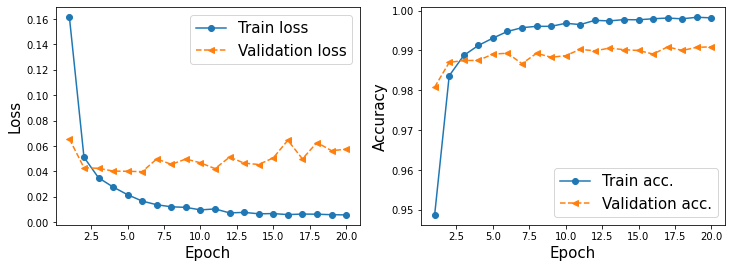

In [87]:
import matplotlib.pyplot as plt


x_arr = np.arange(len(hist[0])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist[0], '-o', label='Train loss')
ax.plot(x_arr, hist[1], '--<', label='Validation loss')
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)
ax.legend(fontsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist[2], '-o', label='Train acc.')
ax.plot(x_arr, hist[3], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)

#plt.savefig('figures/14_13.png')
plt.show()

In [89]:
# torch.cuda.synchronize()
model_cpu = model.cpu()
pred = model(mnist_test_dataset.data.unsqueeze(1) / 255.)
is_correct = (torch.argmax(pred, dim=1) == mnist_test_dataset.targets).float()
print(f'Test accuracy: {is_correct.mean():.4f}') 

Test accuracy: 0.9924


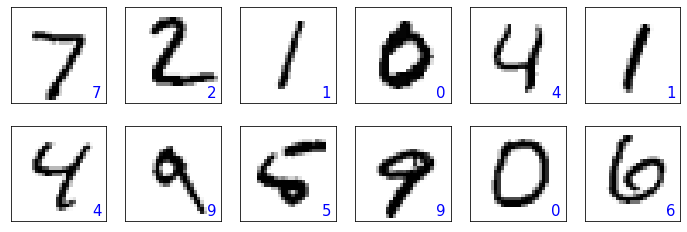

In [90]:
fig = plt.figure(figsize=(12, 4))
for i in range(12):
    ax = fig.add_subplot(2, 6, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    img = mnist_test_dataset[i][0][0, :, :]
    pred = model(img.unsqueeze(0).unsqueeze(1))
    y_pred = torch.argmax(pred)
    ax.imshow(img, cmap='gray_r')
    ax.text(0.9, 0.1, y_pred.item(), 
            size=15, color='blue',
            horizontalalignment='center',
            verticalalignment='center', 
            transform=ax.transAxes)
    
    
#plt.savefig('figures/14_14.png')
plt.show()